# $k$-Nearest Neighbors

We will introduce our first classification algorithm, $k$-nearest neighbors ($k$NN). 

## What we will accomplish

In ths notebook we will:
- Introduce $k$NN classification,
- Discuss our first classification performance metric and
- See the `iris` data set for the first time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## The algorithm

The way that $k$NN makes predictions from the training set is pretty straightforward.
- You input a point you would like to predict on, $X^*$,
- It finds the $k$ closest points to $X^*$ in the training set, these are called $X^*$'s nearest neighbors,
- The categories of each of the nearest neighbors are tabulated and
- The category that recieves the most <i>votes</i> is what is predicted for $X^*$,
    - If there is a tie between two or more categories, the prediction is chosen at random from the tied classes.
    
As always this may be easier to understand with pictures. Suppose we have training data with $2$ features that can be one of two classes, one represented by a red circle the other represented by a green triangle. In these examples I have chosen $k=4$.

<br>
<br>

<img src="knn1.png" width="60%"></img>

Here $k$NN would predict that the data point represented by the black X is a red circle.

<br>
<br>
<br>
<br>

<img src="knn2.png" width="60%"></img>

Here $k$NN would predict that the data point represented by the black X is a green triangle.

<br>
<br>
<br>
<br>

<img src="knn3.png" width="60%"></img>

Here $k$NN would randomly choose between a red circle and a green triangle for the data point represented by the black X.

<i>Note, that while we seemingly used Euclidean distance in these example, we can in principle use any distance metric we would like. Also while we gave each neighbor an equally weighted vote, we could weight the votes. One way votes are weighted is the inverse of the distance to our data point of interest.</i>

## $k$NN in `sklearn`

### The iris data set

We will demonstrate how to implement $k$NN on a famous data set whose description can be found here <a href="https://archive.ics.uci.edu/ml/datasets/Iris">https://archive.ics.uci.edu/ml/datasets/Iris</a>. This is a very popular data set for testing classification algorithms.

Each observation represents an iris (a type of flower) and gives it's measurements including:
- `sepal_length`: the length of the iris's sepal in cm.
- `sepal_width`: the width of the iris's sepal in cm.
- `petal_length`: the length of the iris's petal in cm.
- `petal_width`: the width of the iris's petal in cm.
- `iris_class`: the class of the iris, can be:
    - `0` meaning it is a setosa iris
    - `1` meaning it is a versicolor iris
    - `2` meaning it is a virginica iris

In [2]:
## to get the iris data
from sklearn.datasets import load_iris

## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'],columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,iris_class
88,5.6,3.0,4.1,1.3,1
53,5.5,2.3,4.0,1.3,1
56,6.3,3.3,4.7,1.6,1
58,6.6,2.9,4.6,1.3,1
50,7.0,3.2,4.7,1.4,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
## Making a statified train test split
iris_train, iris_test = train_test_split(iris_df, 
                                            random_state=431,
                                            shuffle=True,
                                            test_size=.2,
                                            stratify=iris_df['iris_class'])

In [7]:
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
85,6.0,3.4,4.5,1.6,1
95,5.7,3.0,4.2,1.2,1
101,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
80,5.5,2.4,3.8,1.1,1


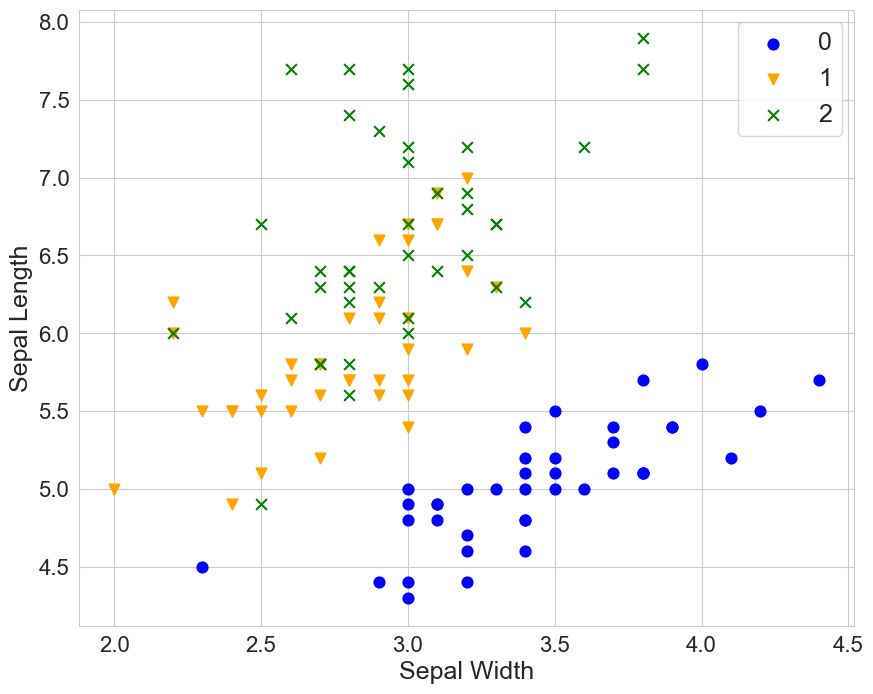

In [8]:
## Plotting the training data
## sepal_width against sepal_length
plt.figure(figsize=(10,8))

plt.scatter(iris_train.loc[iris_train.iris_class==0].sepal_width,
            iris_train.loc[iris_train.iris_class==0].sepal_length,
            c='blue',
            s=60,
            label="0")

plt.scatter(iris_train.loc[iris_train.iris_class==1].sepal_width,
            iris_train.loc[iris_train.iris_class==1].sepal_length,
            c='orange',
            s=60,
            marker='v',
            label="1")

plt.scatter(iris_train.loc[iris_train.iris_class==2].sepal_width,
            iris_train.loc[iris_train.iris_class==2].sepal_length,
            c='green',
            s=60,
            marker='x',
            label="2")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Sepal Width", fontsize=18)
plt.ylabel("Sepal Length", fontsize=18)
plt.legend(fontsize=18)

plt.show()

$k$NN can be implemented in `sklearn` with `KNeighborsClassifier`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html</a>.

We will now build a $k$NN classifier using this model object, with $k=5$. We will not implement cross-validation because I am just demonstrating how to "fit" a $k$NN model with `sklearn`. (Note fit is in quotation marks because this algorithm actually has no fitting step!).

In [9]:
## import here
from sklearn.neighbors import KNeighborsClassifier

In [13]:
iris_train.columns[:4]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [24]:
## make the model object
knn = KNeighborsClassifier(5)

## "fit" the model object
knn.fit(iris_train[iris_train.columns[:4]], iris_train.iris_class)

## predict on the training set
knn.predict(iris_train[iris_train.columns[:4]])


/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1,
       1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2,
       0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       0, 2, 0, 1, 2, 2, 1, 2, 2, 2])

##### How to measure classification performance?

There are many ways! Perhaps the most common, or default approach is to use <i>accuracy</i>. Accuracy measures the proportion of all predictions made that are correct.

In [25]:
## We define it by hand here
## but you can also use accuracy_score from sklearn
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
def accuracy(true, predicted):
    return np.sum(true==predicted)/len(predicted)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
## Get the training accuracy for our model here
accuracy(iris_train.iris_class, knn.predict(iris_train[iris_train.columns[:4]]))

## to use accuracy_score
accuracy_score(iris_train.iris_class, knn.predict(iris_train[iris_train.columns[:4]]))

/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimina

0.9833333333333333

#### Prediction probabilities

Before finishing this notebook we will see how to get classification probabilities with `sklearn`. For many applications it is more useful to have the probability that a certain observation is a certain class, rather than a predicted class itself. `sklearn` classification models have a `predict_proba` method that gives this. For unweighted $k$NN this gives the fraction of the observations nearest neighbors that are of each class.

In [28]:
## show predict_proba
knn.predict_proba(iris_train[iris_train.columns[:4]])

array([[0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. 

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)